|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) + [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html) +  [WIRED Global Center](https://resilience.utah.edu/) <br> created by [Valerio Pascucci](http://cedmav.org/)   |![nsdf](images//NSDF-smaller.PNG)  |![NASA](images//NASA.png)| ![wired](images//wired-logo-small.png) |
|:---|:---:|:---:|---:|

## Uncomment the line below if any library is missing

In [10]:
#!pip install --upgrade openvisuspy numpy matplotlib

In [11]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
#Stores the OpenVisus cache in the local direcrtory 

try:
  import OpenVisus as ov
except:
  sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
  import OpenVisus as ov

os.environ["VISUS_CACHE"]=os.environ.get("VISUS_CACHE","./.visus_cache")
print("VISUS_CACHE is ",os.environ["VISUS_CACHE"])
os.makedirs(os.environ["VISUS_CACHE"],exist_ok=True)

output_dir = ".output"
os.makedirs(output_dir,exist_ok=True)

VISUS_CACHE is  ./.visus_cache


## Load the data **`dataset_name`** into the numpy array **`data`**

In [14]:
model = "ACCESS-CM2"

variables = {
    "hurs":    "Near-Surface Relative Humidity",
    "huss":    "Near-Surface Specific Humidity",
    "pr":      "Precipitation",
    "rlds" :   "Surface Downwelling Longwave Radiation",
    "rsds":    "Surface Downwelling Shortwave Radiation",
    "sfcWind": "Daily-Mean Near-Surface Wind Speed",
    "tas":     "Daily Near-Surface Air Temperature",
    "tasmax":  "Daily Maximum Near-Surface Air Temperature",
    "tasmin":  "Daily Minimum Near-Surface Air Temperature"
}

variable  = "tas" 

year = 2020 
# 2015 is the year whne the data switches from historical to simulated
scenario = "historical" if year < 2015 else "ssp585"

# Open (connect to) dataset
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"
print("dataset_name",dataset_name)
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")

# Corresponds to July 21. See https://nsidc.org/data/user-resources/help-center/day-year-doy-calendar
day_of_the_year = 202 
timestep =year*365 + day_of_the_year
quality = 0  # 0 = load full resolution (-4 coarse, -8 coarser)
data=db.read(time=timestep,quality=quality) #load anta in a numpy array
np.info(data) # print array information

dataset_name tas_day_ACCESS-CM2_ssp585_r1i1p1f1_gn
class:  ndarray
shape:  (600, 1440)
strides:  (5760, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x233dc26b040
byteorder:  little
byteswap:  False
type: float32


## Plot the data if you like

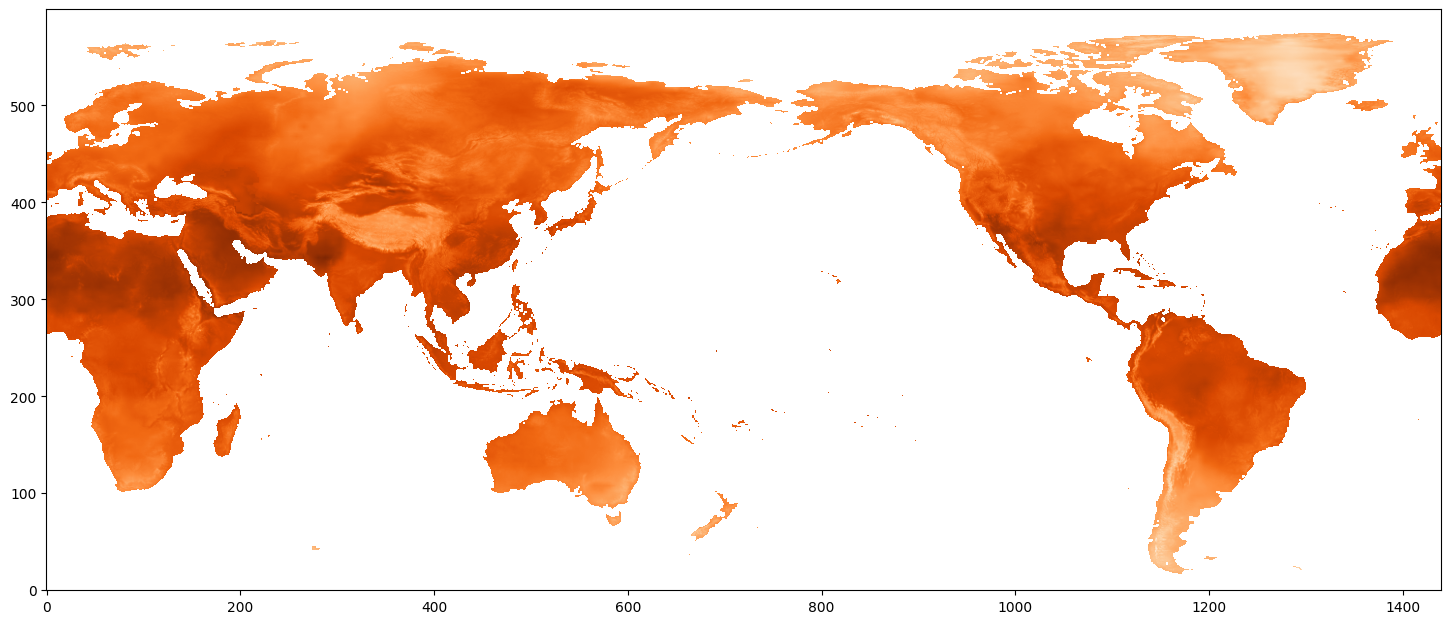

252.50864 315.9895


In [15]:
my_cmap = 'Oranges'
plt.subplots(figsize=(18,9))
plt.imshow(data, cmap=my_cmap,origin='lower') # matplotlib puts the origin on the top left instead of bottom left
plt.savefig(os.path.join(output_dir,"cmip6_IDX_01_read_data_old.png"))
plt.show()
print(np.nanmin(data),np.nanmax(data))